# Cooperative Factor Analysis
This module analyzes Gal4 CC in three TF knockout strains that were thought to interact with Gal4p 

Written by PSR

In [2]:
from analyze_sig_hits_v2 import *
import scipy
import matplotlib.pyplot as plt
import Bio
from scipy import stats
from Bio.Seq import Seq
from Bio.Alphabet.IUPAC import unambiguous_dna, ambiguous_dna
from Bio import SeqUtils
import pandas as pd
from __future__ import division

In [3]:
sig_hits = "sig_prom_Gal4_FL_HarbIG_Final.txt"
sig_hits_hmo1 = "gal4_hmo1_ko.sig.txt"
sig_hits_sef1 = "gal4_sef1_ko.sig.txt"
sig_hits_yrm1 = "gal4_yrm_ko.sig.txt"
sig_hits_leu3 = "gal4_leu3_ko.sig.txt"

In [4]:
sig_df = pd.read_csv(sig_hits_hmo1,sep="\t")
# Chromosome_Dict={"chrI": "Chr1", "chrII": "Chr2:", "chrIII": "Chr3", "chrIV": "Chr4", "chrV": "Chr5", "chrVI": "Chr6", "chrVII":"Chr7", "chrVIII":"Chr8", "chrIX":"Chr9", "chrX":"Chr10", "chrXI":"Chr11", "chrXII":"Chr12", "chrXIII":"Chr13", "chrXIV":"Chr14", "chrXV":"Chr15", "chrXVI":"Chr16", "chrM":"Chr17"}
Chromosome_Dict={"chrI":1, "chrII":2, "chrIII":3, "chrIV":4, "chrV":5, "chrVI":6, "chrVII":7, "chrVIII":8, "chrIX":9, "chrX":10, "chrXI":11, "chrXII":12, "chrXIII":13, "chrXIV":14, "chrXV":15, "chrXVI":16, "chrM":17}
test  = sig_df.replace({"Chr": Chromosome_Dict})

In [5]:
test

,Intergenic Region,Chr,Start,End,Left Feature,Right Feature,Left Common Name,Right Common Name,TPH,Log TPH,...,Experiment Hops,Fraction Background,Fraction Experiment,EB ratio,Background Hops Lax,Experiment Hops Lax,TPH Lax,TPH Lax BS,CHG pvalue Lax,Poisson pvalue Lax
0,chrIV: 893927-895035,4,893927.0,895035.0,YDR214W,YDR216W,AHA1,ADR1,952.106174,9.894979,...,66,0.000499,0.009521,19.066833,43,66,952.106174,900.982038,2.981282e-12,0.000000e+00
1,chrXII: 289250-290212,12,289250.0,290212.0,YLR080W,YLR081W,EMP46,GAL2,7111.944605,12.796028,...,493,0.000559,0.071119,127.272032,50,495,7140.796307,7081.349637,0.000000e+00,0.000000e+00
2,chrXI: 613885-615730,11,613885.0,615730.0,YKR092C,YKR093W,SRP40,PTR2,4010.386613,11.969526,...,278,0.000915,0.040104,43.806443,77,278,4010.386613,3918.838740,0.000000e+00,0.000000e+00
3,chrXVI: 114315-115312,16,114315.0,115312.0,YPL231W,YPL230W,FAS2,USV1,822.273514,9.683475,...,57,0.000321,0.008223,25.615038,37,57,822.273514,778.282978,0.000000e+00,0.000000e+00
4,chrXIII: 469476-473420,13,469476.0,473420.0,YMR101C,YMR104C,SRT1,YPK2,663.589152,9.374146,...,46,0.000511,0.006636,12.979958,43,47,678.015003,626.890866,0.000000e+00,0.000000e+00
5,chrXIII: 477606-478301,13,477606.0,478301.0,YMR105C,YMR106C,PGM2,YKU80,317.368725,8.310016,...,22,0.000238,0.003174,13.346783,21,22,317.368725,292.401123,2.065315e-11,0.000000e+00
6,chrI: 67520-68716,1,67520.0,68716.0,YAL040C,YAL039C,CLN3,CYC3,1658.972879,10.696075,...,115,0.000690,0.016590,24.057681,73,177,2553.375649,2466.583510,0.000000e+00,0.000000e+00
7,chrV: 122929-123657,5,122929.0,123657.0,YEL017C-A,YEL017W,PMP2,GTT3,504.904789,8.979868,...,35,0.000511,0.005049,9.876055,45,35,504.904789,451.402786,0.000000e+00,0.000000e+00
8,chrXII: 442737-445524,12,442737.0,445524.0,YLR151C,YLR153C,PCD1,ACS2,1125.216388,10.135987,...,78,0.000428,0.011252,26.289118,36,78,1125.216388,1082.414785,0.000000e+00,0.000000e+00
9,chrXV: 988782-989789,15,988782.0,989789.0,YOR348C,YOR349W,PUT4,CIN1,620.311598,9.276849,...,43,0.001022,0.006203,6.066720,96,48,692.440854,578.303247,0.000000e+00,0.000000e+00


In [6]:
test


,Intergenic Region,Chr,Start,End,Left Feature,Right Feature,Left Common Name,Right Common Name,TPH,Log TPH,...,Experiment Hops,Fraction Background,Fraction Experiment,EB ratio,Background Hops Lax,Experiment Hops Lax,TPH Lax,TPH Lax BS,CHG pvalue Lax,Poisson pvalue Lax
0,chrIV: 893927-895035,4,893927.0,895035.0,YDR214W,YDR216W,AHA1,ADR1,952.106174,9.894979,...,66,0.000499,0.009521,19.066833,43,66,952.106174,900.982038,2.981282e-12,0.000000e+00
1,chrXII: 289250-290212,12,289250.0,290212.0,YLR080W,YLR081W,EMP46,GAL2,7111.944605,12.796028,...,493,0.000559,0.071119,127.272032,50,495,7140.796307,7081.349637,0.000000e+00,0.000000e+00
2,chrXI: 613885-615730,11,613885.0,615730.0,YKR092C,YKR093W,SRP40,PTR2,4010.386613,11.969526,...,278,0.000915,0.040104,43.806443,77,278,4010.386613,3918.838740,0.000000e+00,0.000000e+00
3,chrXVI: 114315-115312,16,114315.0,115312.0,YPL231W,YPL230W,FAS2,USV1,822.273514,9.683475,...,57,0.000321,0.008223,25.615038,37,57,822.273514,778.282978,0.000000e+00,0.000000e+00
4,chrXIII: 469476-473420,13,469476.0,473420.0,YMR101C,YMR104C,SRT1,YPK2,663.589152,9.374146,...,46,0.000511,0.006636,12.979958,43,47,678.015003,626.890866,0.000000e+00,0.000000e+00
5,chrXIII: 477606-478301,13,477606.0,478301.0,YMR105C,YMR106C,PGM2,YKU80,317.368725,8.310016,...,22,0.000238,0.003174,13.346783,21,22,317.368725,292.401123,2.065315e-11,0.000000e+00
6,chrI: 67520-68716,1,67520.0,68716.0,YAL040C,YAL039C,CLN3,CYC3,1658.972879,10.696075,...,115,0.000690,0.016590,24.057681,73,177,2553.375649,2466.583510,0.000000e+00,0.000000e+00
7,chrV: 122929-123657,5,122929.0,123657.0,YEL017C-A,YEL017W,PMP2,GTT3,504.904789,8.979868,...,35,0.000511,0.005049,9.876055,45,35,504.904789,451.402786,0.000000e+00,0.000000e+00
8,chrXII: 442737-445524,12,442737.0,445524.0,YLR151C,YLR153C,PCD1,ACS2,1125.216388,10.135987,...,78,0.000428,0.011252,26.289118,36,78,1125.216388,1082.414785,0.000000e+00,0.000000e+00
9,chrXV: 988782-989789,15,988782.0,989789.0,YOR348C,YOR349W,PUT4,CIN1,620.311598,9.276849,...,43,0.001022,0.006203,6.066720,96,48,692.440854,578.303247,0.000000e+00,0.000000e+00


In [7]:
tf = "gal4"
pwm_cutoff = 13.0 
sig_df = pd.read_csv(sig_hits,sep="\t")
#sig_df  = sig_df.replace({"Chr": Chromosome_Dict})
sig_df = add_seq_to_frame(sig_df)
sig_df = add_pwm_info(sig_df,tf,pwm_cutoff) 
sig_df[tf +"_site"] = sig_df[tf+ " score"].apply(lambda x: 0 if x == [] else 1)
bound = sig_df.loc[sig_df["Poisson pvalue"] < 1.1e-5] 
bound_nosite = bound.loc[bound[tf +"_site"] == 0]
bound_withsite = bound.loc[bound[tf +"_site"] == 1]
bound_nosite

,Unnamed: 0,Intergenic Region,Chr,Start,End,Left Feature,Right Feature,Left Common Name,Right Common Name,TPH,...,TPH Lax BS,CHG pvalue Lax,Poisson pvalue Lax,Harbison pvalue,Harbison IG pvalue,Sequence,gal4 pos,gal4 score,gal4 orientaion,gal4_site
2,2,Chr11: 613527-615372,11.0,613527.0,615372.0,YKR092C,YKR093W,SRP40,PTR2,3257.541982,...,3169.976308,1.330865e-10,0.000000e+00,0.85400,1.0000,"(C, G, C, C, G, C, T, A, G, A, A, C, T, G, G, ...",[],[],[],0
3,3,Chr11: 229524-231871,11.0,229524.0,231871.0,YKL110C,YKL109W,KTI12,HAP4,2603.655818,...,2484.335559,0.000000e+00,0.000000e+00,0.30400,1.0000,"(T, T, A, T, G, C, C, T, A, A, A, G, A, T, T, ...",[],[],[],0
4,4,Chr4: 1488983-1490589,4.0,1488983.0,1490589.0,YDR524C,YDR525W-A,AGE1,SNA2,2565.017090,...,2618.705544,6.059087e-11,0.000000e+00,0.85400,0.9730,"(T, A, C, A, T, C, G, A, A, G, A, G, A, T, T, ...",[],[],[],0
6,6,Chr4: 368211-369769,4.0,368211.0,369769.0,YDL048C,YDL047W,STP4,SIT4,1952.741864,...,1877.685571,0.000000e+00,0.000000e+00,0.10500,1.0000,"(C, T, A, T, C, A, A, A, T, G, G, T, G, A, A, ...",[],[],[],0
7,7,Chr5: 117474-120498,5.0,117474.0,120498.0,YEL020W-A,YEL019C,TIM9,MMS21,1328.577798,...,1288.248300,0.000000e+00,0.000000e+00,1.00000,1.0000,"(C, T, G, T, G, T, C, A, A, T, G, A, C, T, T, ...",[],[],[],0
8,8,Chr12: 442738-445525,12.0,442738.0,445525.0,YLR151C,YLR153C,PCD1,ACS2,1028.384604,...,988.931938,5.202150e-11,0.000000e+00,0.25400,0.7640,"(T, C, A, T, T, C, C, A, A, T, G, A, A, T, A, ...",[],[],[],0
9,9,Chr1: 67521-68717,1.0,67521.0,68717.0,YAL040C,YAL039C,CLN3,CYC3,897.607371,...,1663.173887,0.000000e+00,0.000000e+00,0.36000,0.8460,"(C, A, C, T, A, G, C, A, A, T, G, G, C, C, C, ...",[],[],[],0
10,10,Chr13: 774014-774751,13.0,774014.0,774751.0,YMR251W,YMR251W-A,GTO3,HOR7,873.829692,...,1897.357921,0.000000e+00,0.000000e+00,0.26800,0.5650,"(G, T, G, G, C, T, C, A, A, G, A, A, T, A, T, ...",[],[],[],0
11,11,Chr16: 431366-432585,16.0,431366.0,432585.0,YPL063W,YPL061W,TIM50,ALD6,861.940853,...,781.111000,8.223722e-11,0.000000e+00,0.21700,0.4050,"(G, G, G, C, G, G, G, C, A, A, A, C, A, T, T, ...",[],[],[],0
12,12,Chr4: 893925-895032,4.0,893925.0,895032.0,YDR214W,YDR216W,AHA1,ADR1,793.580027,...,762.338018,8.481515e-11,0.000000e+00,0.21700,0.8920,"(T, T, T, C, C, A, T, G, A, G, T, C, G, C, A, ...",[],[],[],0


In [8]:
def df_bound_nosite(sig_hits, tf = "Gal4", pwm_cutoff = 13.00):
    sig_df = pd.read_csv(sig_hits,sep="\t")
    sig_df  = sig_df.replace({"Chr": Chromosome_Dict})
    sig_df = add_seq_to_frame(sig_df)
    sig_df = add_pwm_info(sig_df,tf,pwm_cutoff) 
    sig_df[tf +"_site"] = sig_df[tf+ " score"].apply(lambda x: 0 if x == [] else 1)
    bound = sig_df.loc[sig_df["Poisson pvalue"] < 1.1e-5] 
    bound_nosite = bound.loc[bound[tf +"_site"] == 0]
    bound_withsite = bound.loc[bound[tf +"_site"] == 1]
    bound_nosite = bound_nosite.sort_values(by=['Left Common Name'])
    return bound_nosite

In [9]:
#gal4_wt = df_bound_nosite(sig_hits)
hmo1_ko = df_bound_nosite(sig_hits_hmo1)
sef1_ko = df_bound_nosite(sig_hits_sef1)
yrm1_ko = df_bound_nosite(sig_hits_yrm1)
leu3_ko = df_bound_nosite(sig_hits_leu3)






In [10]:
gal4_wt = bound_nosite.sort_values(by=['Left Common Name'])



In [11]:
gal4_wt = gal4_wt.drop(["Unnamed: 0"], axis=1)

In [12]:
common = sef1_ko.merge(gal4_wt, on=["Left Common Name"])
#result = dataframe1[~dataframe1.column1.isin(common.column1)]

In [13]:
common2 = hmo1_ko.merge(common, on=["Left Common Name"])
common3 = yrm1_ko.merge(common2, on=["Left Common Name"])




In [14]:
result_hmo1 = hmo1_ko[hmo1_ko["Left Common Name"].isin(common3["Left Common Name"])]
result_sef1 = sef1_ko[sef1_ko["Left Common Name"].isin(common3["Left Common Name"])]
result_yrm1 = yrm1_ko[yrm1_ko["Left Common Name"].isin(common3["Left Common Name"])]
result_gal4 = gal4_wt[gal4_wt["Left Common Name"].isin(common3["Left Common Name"])]



# result_sef1 = sef1_ko[sef1_ko.Start.isin(common3.Start_x)]
# result_yrm1 = yrm1_ko[yrm1_ko.Start.isin(common3.Start_x)]
# result_gal4 = gal4_wt[gal4_wt.Start.isin(common3.Start_x)]






In [15]:
result_gal4

,Intergenic Region,Chr,Start,End,Left Feature,Right Feature,Left Common Name,Right Common Name,TPH,Log TPH,...,TPH Lax BS,CHG pvalue Lax,Poisson pvalue Lax,Harbison pvalue,Harbison IG pvalue,Sequence,gal4 pos,gal4 score,gal4 orientaion,gal4_site
30,Chr14: 661376-662915,14.0,661376.0,662915.0,YNR016C,YNR017W,ACC1,TIM23,323.970872,8.339720,...,255.650401,0.000000e+00,0.000000e+00,0.45300,1.000,"(T, A, A, C, A, A, A, G, T, C, C, C, T, T, A, ...",[],[],[],0
35,Chr13: 912141-912878,13.0,912141.0,912878.0,YMR318C,YMR319C,ADH6,FET4,249.665626,7.963853,...,204.439399,0.000000e+00,0.000000e+00,0.31400,0.493,"(G, A, A, T, A, T, C, A, C, T, A, C, C, G, C, ...",[],[],[],0
4,Chr4: 1488983-1490589,4.0,1488983.0,1490589.0,YDR524C,YDR525W-A,AGE1,SNA2,2565.017090,11.324753,...,2618.705544,6.059087e-11,0.000000e+00,0.85400,0.973,"(T, A, C, A, T, C, G, A, A, G, A, G, A, T, T, ...",[],[],[],0
12,Chr4: 893925-895032,4.0,893925.0,895032.0,YDR214W,YDR216W,AHA1,ADR1,793.580027,9.632232,...,762.338018,8.481515e-11,0.000000e+00,0.21700,0.892,"(T, T, T, C, C, A, T, G, A, G, T, C, G, C, A, ...",[],[],[],0
41,Chr13: 353135-353870,13.0,353135.0,353870.0,YMR042W,YMR043W,ARG80,MCM1,213.999108,7.741461,...,327.068867,0.000000e+00,0.000000e+00,0.72800,0.918,"(T, G, G, C, C, T, G, G, T, C, T, A, C, A, C, ...",[],[],[],0
63,Chr14: 633858-634346,14.0,633858.0,634346.0,YNR002C,YNR003C,ATO2,RPC34,133.749443,7.063389,...,124.297700,5.698109e-11,0.000000e+00,0.19100,0.681,"(T, G, T, T, T, T, T, G, C, C, C, G, C, A, G, ...",[],[],[],0
9,Chr1: 67521-68717,1.0,67521.0,68717.0,YAL040C,YAL039C,CLN3,CYC3,897.607371,9.809941,...,1663.173887,0.000000e+00,0.000000e+00,0.36000,0.846,"(C, A, C, T, A, G, C, A, A, T, G, G, C, C, C, ...",[],[],[],0
19,Chr1: 69526-71787,1.0,69526.0,71787.0,YAL039C,YAL038W,CYC3,CDC19,511.220092,8.997801,...,851.800956,5.876610e-11,0.000000e+00,0.41900,1.000,"(T, A, T, C, G, T, T, A, T, C, T, C, C, C, T, ...",[],[],[],0
25,Chr2: 465764-467242,2.0,465764.0,467242.0,YBR112C,YBR114W,CYC8,RAD16,377.470649,8.560221,...,305.301138,0.000000e+00,0.000000e+00,0.29500,1.000,"(A, G, A, G, C, C, A, A, G, T, T, T, C, C, G, ...",[],[],[],0
16,Chr16: 114315-115312,16.0,114315.0,115312.0,YPL231W,YPL230W,FAS2,USV1,644.969535,9.333087,...,599.914166,0.000000e+00,0.000000e+00,0.51400,0.376,"(A, A, T, C, G, T, A, C, G, C, G, T, T, A, A, ...",[],[],[],0


In [16]:
result_hmo1

,Intergenic Region,Chr,Start,End,Left Feature,Right Feature,Left Common Name,Right Common Name,TPH,Log TPH,...,Experiment Hops Lax,TPH Lax,TPH Lax BS,CHG pvalue Lax,Poisson pvalue Lax,Sequence,Gal4 pos,Gal4 score,Gal4 orientaion,Gal4_site
34,chrXIV: 661374-662913,14,661374.0,662913.0,YNR016C,YNR017W,ACC1,TIM23,360.646278,8.494441,...,25,360.646278,300.010674,6.809753e-11,1.981304e-12,"(C, T, T, A, A, C, A, A, A, G, T, C, C, C, T, ...",[],[],[],0
33,chrXIII: 912143-912880,13,912143.0,912880.0,YMR318C,YMR319C,ADH6,FET4,346.220427,8.435547,...,24,346.220427,286.773757,4.685784e-10,7.949863e-12,"(A, T, A, T, C, A, C, T, A, C, C, G, C, A, G, ...",[],[],[],0
11,chrIV: 1488990-1490596,4,1488990.0,1490596.0,YDR524C,YDR525W-A,AGE1,SNA2,2279.284478,11.154365,...,164,2365.839585,2258.835578,0.000000e+00,0.000000e+00,"(A, A, G, A, G, A, T, T, T, A, A, G, A, A, G, ...",[],[],[],0
0,chrIV: 893927-895035,4,893927.0,895035.0,YDR214W,YDR216W,AHA1,ADR1,952.106174,9.894979,...,66,952.106174,900.982038,2.981282e-12,0.000000e+00,"(T, C, C, A, T, G, A, G, T, C, G, C, A, A, G, ...",[],[],[],0
50,chrXIII: 353136-353871,13,353136.0,353871.0,YMR042W,YMR043W,ARG80,MCM1,201.961916,7.657939,...,22,317.368725,249.599521,6.569499e-08,2.681720e-09,"(G, G, C, C, T, G, G, T, C, T, A, C, A, C, T, ...",[],[],[],0
44,chrXIV: 633856-634344,14,633856.0,634344.0,YNR002C,YNR003C,ATO2,RPC34,173.110214,7.435547,...,12,173.110214,144.575812,8.299417e-06,5.334455e-07,"(G, T, T, G, T, T, T, T, T, G, C, C, C, G, C, ...",[],[],[],0
6,chrI: 67520-68716,1,67520.0,68716.0,YAL040C,YAL039C,CLN3,CYC3,1658.972879,10.696075,...,177,2553.375649,2466.583510,0.000000e+00,0.000000e+00,"(G, C, A, C, T, A, G, C, A, A, T, G, G, C, C, ...",[],[],[],0
37,chrI: 69525-71786,1,69525.0,71786.0,YAL039C,YAL038W,CYC3,CDC19,548.182343,9.098512,...,71,1024.235430,872.051954,0.000000e+00,0.000000e+00,"(C, T, A, T, C, G, T, T, A, T, C, T, C, C, C, ...",[],[],[],0
28,chrII: 465770-467248,2,465770.0,467248.0,YBR112C,YBR114W,CYC8,RAD16,389.497980,8.605472,...,27,389.497980,333.618110,0.000000e+00,7.771561e-15,"(A, A, G, T, T, T, C, C, G, C, A, G, T, T, G, ...",[],[],[],0
3,chrXVI: 114315-115312,16,114315.0,115312.0,YPL231W,YPL230W,FAS2,USV1,822.273514,9.683475,...,57,822.273514,778.282978,0.000000e+00,0.000000e+00,"(A, A, T, C, G, T, A, C, G, C, G, T, T, A, A, ...",[],[],[],0


In [17]:
result_yrm1

,Intergenic Region,Chr,Start,End,Left Feature,Right Feature,Left Common Name,Right Common Name,TPH,Log TPH,...,Experiment Hops Lax,TPH Lax,TPH Lax BS,CHG pvalue Lax,Poisson pvalue Lax,Sequence,Gal4 pos,Gal4 score,Gal4 orientaion,Gal4_site
36,chrXIV: 661374-662913,14,661374.0,662913.0,YNR016C,YNR017W,ACC1,TIM23,321.011673,8.326482,...,33,321.011673,260.376069,8.546863e-11,2.042810e-14,"(C, T, T, A, A, C, A, A, A, G, T, C, C, C, T, ...",[],[],[],0
55,chrXIII: 912143-912880,13,912143.0,912880.0,YMR318C,YMR319C,ADH6,FET4,233.463035,7.867050,...,24,233.463035,174.016365,5.531572e-07,1.549925e-08,"(A, T, A, T, C, A, C, T, A, C, C, G, C, A, G, ...",[],[],[],0
28,chrIV: 1488990-1490596,4,1488990.0,1490596.0,YDR524C,YDR525W-A,AGE1,SNA2,2334.630350,11.188978,...,248,2412.451362,2305.447355,1.274661e-10,0.000000e+00,"(A, A, G, A, G, A, T, T, T, A, A, G, A, A, G, ...",[],[],[],0
26,chrIV: 893927-895035,4,893927.0,895035.0,YDR214W,YDR216W,AHA1,ADR1,1254.863813,10.293315,...,132,1284.046693,1232.922556,0.000000e+00,0.000000e+00,"(T, C, C, A, T, G, A, G, T, C, G, C, A, A, G, ...",[],[],[],0
56,chrXIII: 353136-353871,13,353136.0,353871.0,YMR042W,YMR043W,ARG80,MCM1,214.007782,7.741519,...,46,447.470817,379.701613,0.000000e+00,0.000000e+00,"(G, G, C, C, T, G, G, T, C, T, A, C, A, C, T, ...",[],[],[],0
49,chrXIV: 633856-634344,14,633856.0,634344.0,YNR002C,YNR003C,ATO2,RPC34,175.097276,7.452013,...,21,204.280156,175.745754,1.638537e-09,3.662404e-12,"(G, T, T, G, T, T, T, T, T, G, C, C, C, G, C, ...",[],[],[],0
32,chrI: 67520-68716,1,67520.0,68716.0,YAL040C,YAL039C,CLN3,CYC3,1118.677043,10.127578,...,132,1284.046693,1197.254554,9.824452e-11,0.000000e+00,"(G, C, A, C, T, A, G, C, A, A, T, G, G, C, C, ...",[],[],[],0
58,chrI: 69525-71786,1,69525.0,71786.0,YAL039C,YAL038W,CYC3,CDC19,389.105058,8.604016,...,46,447.470817,295.287341,8.527770e-09,1.872179e-10,"(C, T, A, T, C, G, T, T, A, T, C, T, C, C, C, ...",[],[],[],0
34,chrII: 465770-467248,2,465770.0,467248.0,YBR112C,YBR114W,CYC8,RAD16,321.011673,8.326482,...,33,321.011673,265.131803,0.000000e+00,2.220446e-15,"(A, A, G, T, T, T, C, C, G, C, A, G, T, T, G, ...",[],[],[],0
22,chrXVI: 114315-115312,16,114315.0,115312.0,YPL231W,YPL230W,FAS2,USV1,622.568093,9.282088,...,64,622.568093,578.577557,5.151912e-11,0.000000e+00,"(A, A, T, C, G, T, A, C, G, C, G, T, T, A, A, ...",[],[],[],0


In [18]:
result_gal4

,Intergenic Region,Chr,Start,End,Left Feature,Right Feature,Left Common Name,Right Common Name,TPH,Log TPH,...,TPH Lax BS,CHG pvalue Lax,Poisson pvalue Lax,Harbison pvalue,Harbison IG pvalue,Sequence,gal4 pos,gal4 score,gal4 orientaion,gal4_site
30,Chr14: 661376-662915,14.0,661376.0,662915.0,YNR016C,YNR017W,ACC1,TIM23,323.970872,8.339720,...,255.650401,0.000000e+00,0.000000e+00,0.45300,1.000,"(T, A, A, C, A, A, A, G, T, C, C, C, T, T, A, ...",[],[],[],0
35,Chr13: 912141-912878,13.0,912141.0,912878.0,YMR318C,YMR319C,ADH6,FET4,249.665626,7.963853,...,204.439399,0.000000e+00,0.000000e+00,0.31400,0.493,"(G, A, A, T, A, T, C, A, C, T, A, C, C, G, C, ...",[],[],[],0
4,Chr4: 1488983-1490589,4.0,1488983.0,1490589.0,YDR524C,YDR525W-A,AGE1,SNA2,2565.017090,11.324753,...,2618.705544,6.059087e-11,0.000000e+00,0.85400,0.973,"(T, A, C, A, T, C, G, A, A, G, A, G, A, T, T, ...",[],[],[],0
12,Chr4: 893925-895032,4.0,893925.0,895032.0,YDR214W,YDR216W,AHA1,ADR1,793.580027,9.632232,...,762.338018,8.481515e-11,0.000000e+00,0.21700,0.892,"(T, T, T, C, C, A, T, G, A, G, T, C, G, C, A, ...",[],[],[],0
41,Chr13: 353135-353870,13.0,353135.0,353870.0,YMR042W,YMR043W,ARG80,MCM1,213.999108,7.741461,...,327.068867,0.000000e+00,0.000000e+00,0.72800,0.918,"(T, G, G, C, C, T, G, G, T, C, T, A, C, A, C, ...",[],[],[],0
63,Chr14: 633858-634346,14.0,633858.0,634346.0,YNR002C,YNR003C,ATO2,RPC34,133.749443,7.063389,...,124.297700,5.698109e-11,0.000000e+00,0.19100,0.681,"(T, G, T, T, T, T, T, G, C, C, C, G, C, A, G, ...",[],[],[],0
9,Chr1: 67521-68717,1.0,67521.0,68717.0,YAL040C,YAL039C,CLN3,CYC3,897.607371,9.809941,...,1663.173887,0.000000e+00,0.000000e+00,0.36000,0.846,"(C, A, C, T, A, G, C, A, A, T, G, G, C, C, C, ...",[],[],[],0
19,Chr1: 69526-71787,1.0,69526.0,71787.0,YAL039C,YAL038W,CYC3,CDC19,511.220092,8.997801,...,851.800956,5.876610e-11,0.000000e+00,0.41900,1.000,"(T, A, T, C, G, T, T, A, T, C, T, C, C, C, T, ...",[],[],[],0
25,Chr2: 465764-467242,2.0,465764.0,467242.0,YBR112C,YBR114W,CYC8,RAD16,377.470649,8.560221,...,305.301138,0.000000e+00,0.000000e+00,0.29500,1.000,"(A, G, A, G, C, C, A, A, G, T, T, T, C, C, G, ...",[],[],[],0
16,Chr16: 114315-115312,16.0,114315.0,115312.0,YPL231W,YPL230W,FAS2,USV1,644.969535,9.333087,...,599.914166,0.000000e+00,0.000000e+00,0.51400,0.376,"(A, A, T, C, G, T, A, C, G, C, G, T, T, A, A, ...",[],[],[],0


In [19]:
data_frames = [result_gal4, result_sef1, result_hmo1, result_yrm1]

In [ ]:
from functools import reduce


In [ ]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Left Common Name'],
                                            how='outer'), data_frames)

In [ ]:
df_merged.plot.bar(x='Left Common Name')


In [22]:
gal4_TPH = result_gal4["TPH Lax BS"].tolist()
sef1_TPH = result_sef1["TPH Lax BS"].tolist()
hmo1_TPH = result_hmo1["TPH Lax BS"].tolist()
yrm1_TPH = result_yrm1["TPH Lax BS"].tolist()

In [27]:
pr_names = result_gal4["Left Common Name"].tolist()

In [34]:
tph_list = pd.DataFrame(
    {'Name': pr_names,
     'gal4_tph': gal4_TPH,
     'sef1_Ko': sef1_TPH,
     'hmo1_Ko': hmo1_TPH,
     'yrm1_Ko': yrm1_TPH




    })

In [49]:
tph_list.to_csv("gal4cooperative_tph.csv", sep = ",")

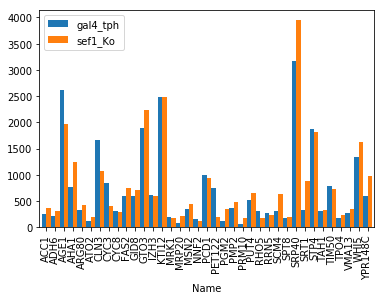

In [45]:
tph_list.plot(x="Name", y=["gal4_tph", "sef1_Ko"], kind="bar", width = 1)


/opt/apps/jupyter/5.4.0-python2.7.12/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  """Entry point for launching an IPython kernel.


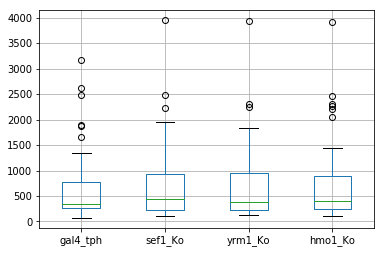

In [48]:
boxplot = tph_list.boxplot(column=['gal4_tph', 'sef1_Ko', "yrm1_Ko", 'hmo1_Ko'])